<a href="https://colab.research.google.com/github/chabazite/DeepLearning_Tensorflow/blob/main/Regression_Life_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Modeling with Tensorflow
- The goal of this notebook is to stay up to date with Tensorflow and keep my skills with different objectives for ML sharp. I will use toy datasets as the goal is not data processing, but to focus on the ML component.
- I don't want to use common boring toy datasets like titanic, or housing prices, but I found a structured dataset on Kaggle that has features of how Life Expectancy for Countries and some data around that country from WHO. This plays into a few other analyses i've done on increase population size.

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv


In [197]:
import tensorflow as tf
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [122]:
df = pl.read_csv('./Life Expectancy Data.csv', has_header=True, separator=',',dtypes={'Population':pl.Float64} )

In [123]:
df.head()

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
str,i64,str,f64,i64,i64,f64,f64,i64,i64,f64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""",2015,"""Developing""",65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.25921,3.3736494e7,17.2,17.3,0.479,10.1
"""Afghanistan""",2014,"""Developing""",59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
"""Afghanistan""",2013,"""Developing""",59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,3.1731688e7,17.7,17.7,0.47,9.9
"""Afghanistan""",2012,"""Developing""",59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.696958e6,17.9,18.0,0.463,9.8
"""Afghanistan""",2011,"""Developing""",59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2.978599e6,18.2,18.2,0.454,9.5


## Exploration of Data

In [59]:
df.schema

OrderedDict([('Country', Utf8),
             ('Year', Int64),
             ('Status', Utf8),
             ('Life expectancy ', Float64),
             ('Adult Mortality', Int64),
             ('infant deaths', Int64),
             ('Alcohol', Float64),
             ('percentage expenditure', Float64),
             ('Hepatitis B', Int64),
             ('Measles ', Int64),
             (' BMI ', Float64),
             ('under-five deaths ', Int64),
             ('Polio', Int64),
             ('Total expenditure', Float64),
             ('Diphtheria ', Int64),
             (' HIV/AIDS', Float64),
             ('GDP', Float64),
             ('Population', Float64),
             (' thinness  1-19 years', Float64),
             (' thinness 5-9 years', Float64),
             ('Income composition of resources', Float64),
             ('Schooling', Float64)])

In [124]:
df = df.rename({ "Life expectancy ":"life_expectancy"
               , 'Measles ':'measles'
               , ' BMI ':'bmi'
               , 'Status': 'status'
               , 'Polio': 'polio'
               , 'Total expenditure': 'total_expenditure'
               , 'GDP': 'gdp'
               , 'Income composition of resources': 'income_composition_resources'
               , 'under-five deaths ':'under_five_deaths'
               , 'Diphtheria ':'diphtheria'
               , ' HIV/AIDS':'hiv_aids'
               ,' thinness  1-19 years':'thinness_1_19_years'
               ,' thinness 5-9 years': 'thinness_5_9_years'
               , 'Country': 'country'
               , 'Year': 'year'
               , 'Adult Mortality': 'adult_mortality'
               , 'Alcohol':'alcohol'
               , 'infant deaths': 'infant_deaths'
               , "Hepatitis B": 'hepatitus_b'
               , 'percentage expenditure': 'percentage_expenditure'
               , 'Population': 'population'
               , 'Schooling': 'schooling'  })

In [125]:
df.shape

(2938, 22)

In [126]:
df.describe()

describe,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitus_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_resources,schooling
str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""2938""",2938.0,"""2938""",2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2286.0,2904.0,2904.0,2771.0,2775.0
"""null_count""","""0""",0.0,"""0""",10.0,10.0,0.0,194.0,0.0,553.0,0.0,34.0,0.0,19.0,226.0,19.0,0.0,448.0,652.0,34.0,34.0,167.0,163.0
"""mean""",null,2007.51872,null,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.59224,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.2753e7,4.839704,4.870317,0.627551,11.992793
"""std""",null,4.613841,null,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.1012e7,4.420195,4.508882,0.210904,3.35892
"""min""","""Afghanistan""",2000.0,"""Developed""",36.3,1.0,0.0,0.01,0.0,1.0,0.0,1.0,0.0,3.0,0.37,2.0,0.1,1.68135,34.0,0.1,0.1,0.0,0.0
"""25%""",null,2004.0,null,63.1,74.0,0.0,0.88,4.673592,77.0,0.0,19.3,0.0,78.0,4.26,78.0,0.1,463.852618,195553.0,1.6,1.5,0.493,10.1
"""50%""",null,2008.0,null,72.1,144.0,3.0,3.76,64.969645,92.0,17.0,43.5,4.0,93.0,5.76,93.0,0.1,1768.92132,1.388115e6,3.3,3.3,0.677,12.3
"""75%""",null,2012.0,null,75.7,228.0,22.0,7.7,441.844624,97.0,361.0,56.2,28.0,97.0,7.49,97.0,0.8,5918.19898,7.423289e6,7.2,7.2,0.779,14.3
"""max""","""Zimbabwe""",2015.0,"""Developing""",89.0,723.0,1800.0,17.87,19479.91161,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7418,1.2939e9,27.7,28.6,0.948,20.7


In [127]:
df.null_count()

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitus_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_resources,schooling
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,10,10,0,194,0,553,0,34,0,19,226,19,0,448,652,34,34,167,163


In [128]:
## Remove all nulls, just to make our dataset easier to work with right now.
df = df.drop_nulls()

In [129]:
df.null_count()

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitus_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_resources,schooling
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


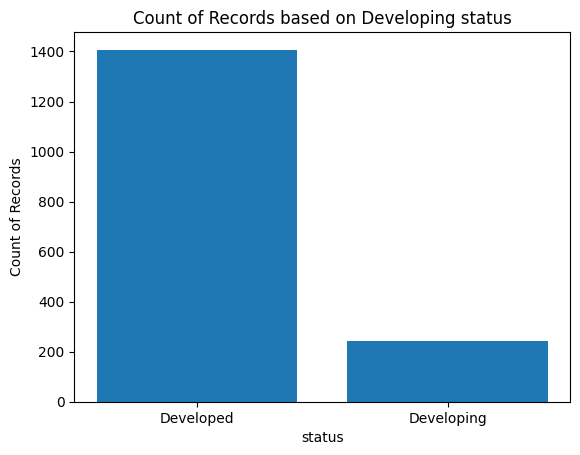

In [130]:
plt.bar(df.group_by('status').count()['status'],df.group_by('status').count()['count'])

plt.xlabel('status')
plt.ylabel('Count of Records')
plt.title('Count of Records based on Developing status')
plt.show()


## Preprocessing Categorical and Numerical Data

In [131]:
## Country and Status are Text Based. Country need Tokenization, and Satus needs one hot encoding

In [132]:
country_list = list(set([value for value in df['country']]))

In [133]:
# Tokenize and vectorize string columns
text_vectorizer_country = tf.keras.layers.TextVectorization(output_sequence_length = 1)
text_vectorizer_country.adapt(country_list)

tokenized_country_tf = text_vectorizer_country(list(df['country']))

In [134]:
# Convert the TensorFlow tensor to a numpy array and flatten it
tokenized_country_np = tokenized_country_tf.numpy().flatten()

# Create a new column in your Polars DataFrame
df = df.with_columns(pl.Series("tokenized_country", tokenized_country_np))


In [135]:
# SkLearn pipeline for Normalization and for One-hot encoding for Status

In [158]:
ct = make_column_transformer(
    (MinMaxScaler(), ['tokenized_country','year','adult_mortality','infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitus_b', 'measles',
                       'bmi', 'under_five_deaths','polio','total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'population','thinness_1_19_years','thinness_5_9_years'
                       ,'income_composition_resources', 'schooling']),
    (OneHotEncoder(handle_unknown = "ignore"), ['status'])
)

## Creating Train/Val/Test Dataset

In [139]:
y = df.select(pl.col('life_expectancy'))
X = df.drop(['life_expectancy','country'])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [152]:
X_train = X_train.to_pandas()
X_test = X_test.to_pandas()
y_train = y_train.to_pandas()
y_test = y_test.to_pandas()

In [156]:
X_train.columns

Index(['year', 'status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitus_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_resources', 'schooling',
       'tokenized_country'],
      dtype='object')

In [159]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [163]:
X_train_normal.shape

(1319, 22)

In [164]:
X_train.shape

(1319, 21)

In [170]:
X_train_tf.shape, X_test_tf.shape, y_train_tf.shape, y_test_tf.shape

(TensorShape([1319, 22]),
 TensorShape([330, 22]),
 TensorShape([1319, 1]),
 TensorShape([330, 1]))

In [211]:
# Convert to Tensors
X_train_tf = tf.constant(X_train_normal)
X_test_tf = tf.constant(X_test_normal)
y_train_tf = tf.constant(y_train)
y_test_tf = tf.constant(y_test)

## Building Regression Model

In [185]:
model = tf.keras.Sequential([])

model.add(tf.keras.layers.Dense(1))

In [187]:
model.layers

In [212]:
# Compile and fit

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model.fit(X_train_tf, y_train_tf, epochs = 100)

Epoch 1/100
42/42 [==============================] - 0s 1ms/step - loss: 68.4289 - mae: 68.4289 - mse: 4758.2178
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 68.0740 - mae: 68.0740 - mse: 4709.4316
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 67.7188 - mae: 67.7188 - mse: 4660.8799
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: 67.3636 - mae: 67.3636 - mse: 4612.4819
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 67.0078 - mae: 67.0078 - mse: 4564.3096
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 66.6521 - mae: 66.6521 - mse: 4516.4126
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 66.2970 - mae: 66.2970 - mse: 4468.9941
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 65.9414 - mae: 65.9414 - mse: 4421.7012
Epoch 9/100
42/42 [==============================] - 0s 1ms/step - loss: 65.5860 - mae: 65.5860 

Text(0.5, 0, 'epochs')

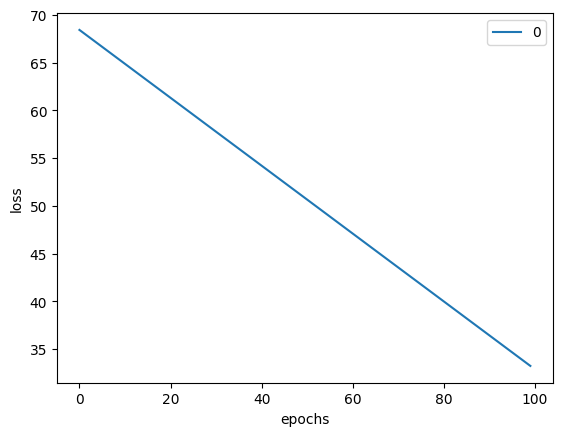

In [213]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [214]:
model.evaluate(X_test_tf,y_test_tf)


11/11 [==============================] - 0s 2ms/step - loss: 33.4253 - mae: 33.4253 - mse: 1175.0206


[33.425315856933594, 33.425315856933594, 1175.0206298828125]

## Experiment to improve model
-  increase epochs to 500 given the loss didn't trail off
- Add 2,3,4 layers @ scaling nuerons
- Change the optimizer to SGD
- change learning rate

In [233]:
tf.random.random_seed = 42
model = tf.keras.Sequential([])

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model.fit(X_train_tf, y_train_tf, epochs = 200,verbose = 0)

Text(0.5, 0, 'epochs')

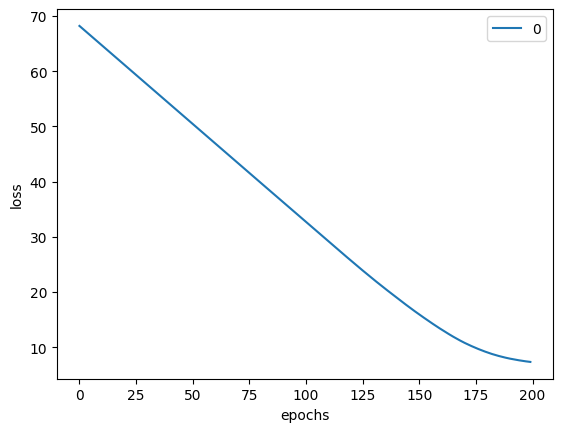

In [234]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [235]:
loss, mae, mse = model.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 2ms/step - loss: 7.0421 - mae: 7.0421 - mse: 84.3774


In [230]:
tf.random.random_seed = 42
# Model 2, Add Layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_1.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

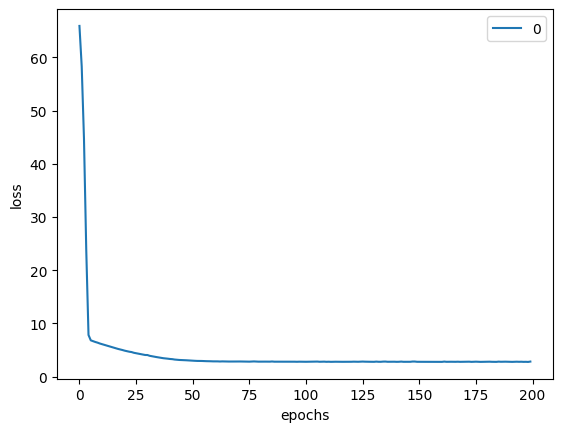

In [231]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [238]:
loss_1, mae_1, mse_1 = model_1.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 2.8057 - mae: 2.8057 - mse: 14.0056


In [236]:
tf.random.random_seed = 42
# Model 2, Add Layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_2.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

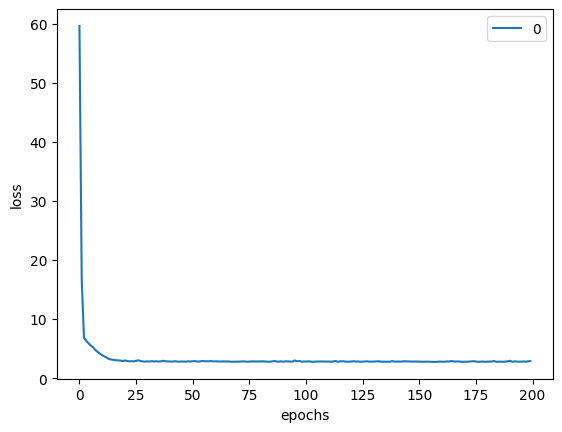

In [237]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [239]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 4ms/step - loss: 2.7831 - mae: 2.7831 - mse: 13.6981


In [240]:
tf.random.random_seed = 42
# Model 3, Add Layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_3.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

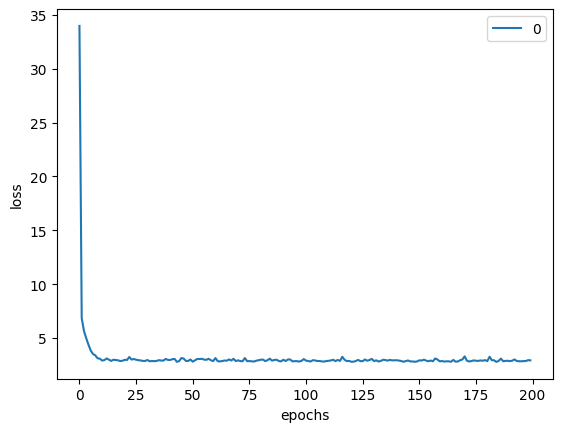

In [241]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [242]:
loss_3, mae_3, mse_3 = model_3.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 2.9879 - mae: 2.9879 - mse: 15.7288


In [243]:
tf.random.random_seed = 42
# Model 4,  Change the optimizer to SGD
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_4.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

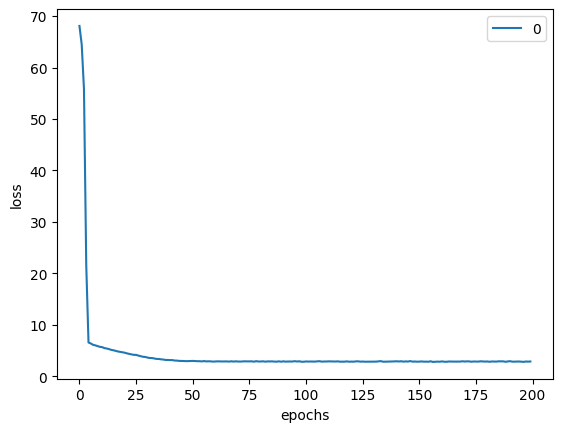

In [244]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [245]:
loss_4, mae_4, mse_4 = model_4.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 2ms/step - loss: 2.8051 - mae: 2.8051 - mse: 14.2522


In [246]:
tf.random.random_seed = 42
# Model 5,  Change the learning rate
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_5.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_5.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

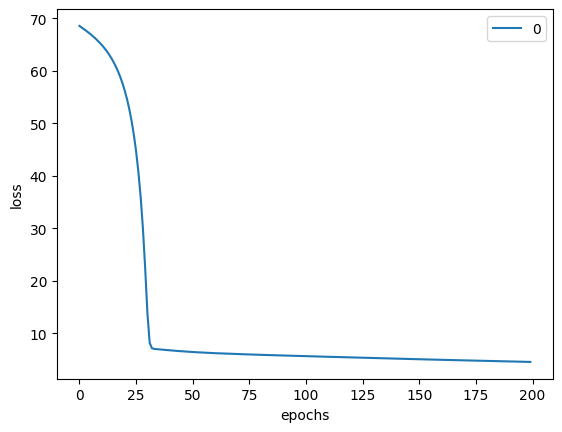

In [247]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [252]:
loss_5, mae_5, mse_5 = model_5.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 4.3700 - mae: 4.3700 - mse: 34.9040


In [253]:
pd.DataFrame({"name":['model','model_1','model_2','model_3','model_4','model_5'],
              "loss":[loss,loss_1,loss_2,loss_3,loss_4,loss_5],
              "mae":[mae,mae_1,mae_2,mae_3,mae_4,mae_5],
              "mse":[mse,mse_1,mse_2,mse_3,mse_4,mse_5]})

,name,loss,mae,mse
0,model,7.042140,7.042140,84.377411
1,model_1,2.805675,2.805675,14.005594
2,model_2,2.783137,2.783137,13.698141
3,model_3,2.987896,2.987896,15.728816
4,model_4,2.805094,2.805094,14.252224
5,model_5,4.369972,4.369972,34.904026


In [254]:
# Model 2 was our best performer. Let's see if we can tweak it any further
tf.random.random_seed = 42
# Model 2, Add Layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_2.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

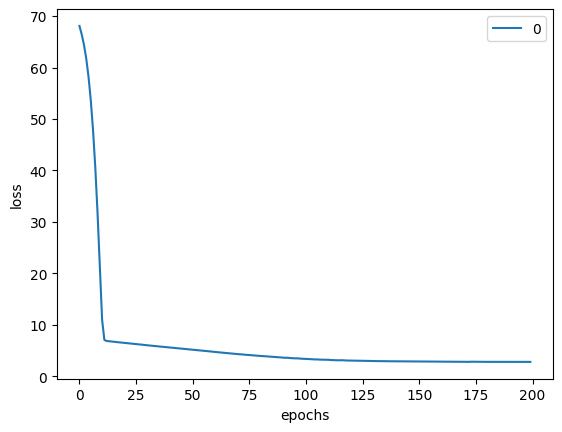

In [255]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [256]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 2.6508 - mae: 2.6508 - mse: 13.0988


In [257]:
# Model 2 was our best performer. Let's see if we can tweak it any further
tf.random.random_seed = 42
# Model 2, Add activation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'ReLU'),
    tf.keras.layers.Dense(50,activation = 'ReLU'),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_2.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

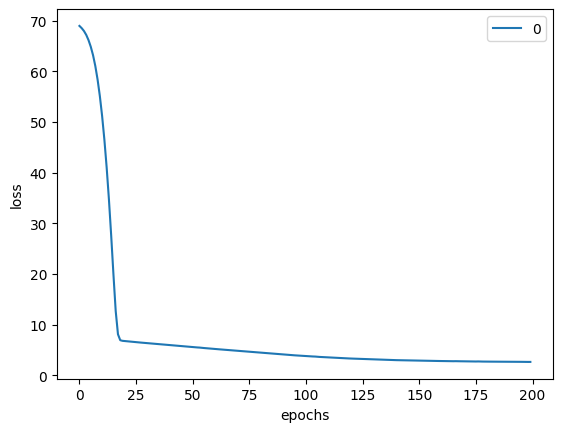

In [258]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [259]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 2.5218 - mae: 2.5218 - mse: 11.5499


In [265]:
# Model 2 was our best performer. Let's see if we can tweak it any further
tf.random.random_seed = 42
# Model 2, Change sigmoid function
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'ReLU'),
    tf.keras.layers.Dense(50,activation = 'sigmoid'),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_2.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

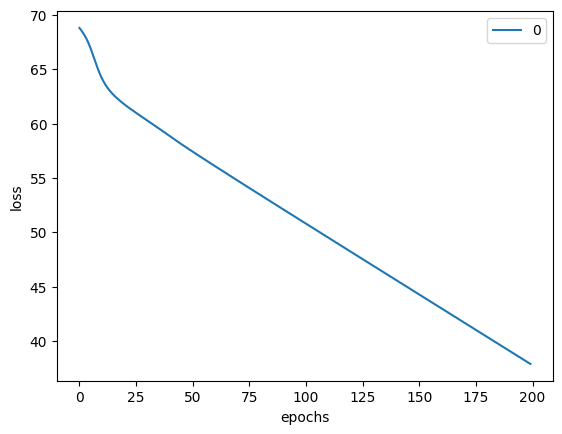

In [266]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [267]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 38.5924 - mae: 38.5924 - mse: 1560.3933


In [279]:
# Model 2 was our best performer. Let's see if we can tweak it any further
tf.random.random_seed = 42
# Model 2, Add activation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'ReLU'),
    tf.keras.layers.Dense(50,activation = 'ReLU'),
    tf.keras.layers.Dense(10,activation = 'ReLU'),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model_2.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

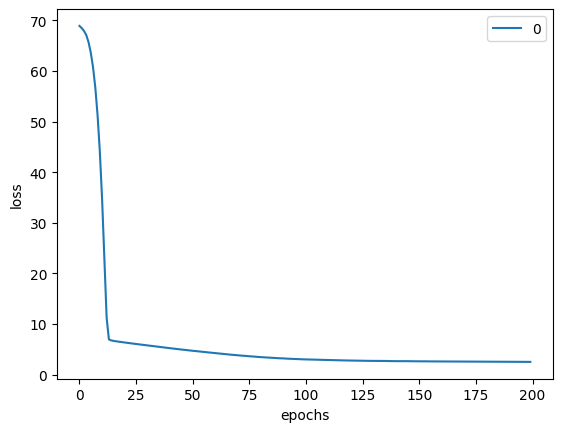

In [269]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [278]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 2ms/step - loss: 2.7497 - mae: 2.7497 - mse: 13.2696


# Final Model has a loss of only 2.5 years on average for life expectancy error. That is pretty good.

In [280]:
# Model 2 was our best performer. Let's see if we can tweak it any further
tf.random.random_seed = 42
# Model 2, Add activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'ReLU'),
    tf.keras.layers.Dense(50,activation = 'ReLU'),
    tf.keras.layers.Dense(10,activation = 'ReLU'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'mae',
              metrics = ['mae',
                        'mse'])



history = model.fit(X_train_tf, y_train_tf, epochs = 200, verbose = 0)

Text(0.5, 0, 'epochs')

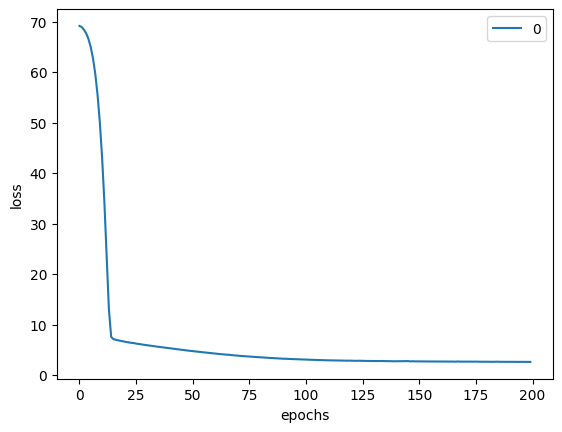

In [281]:
pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [282]:
model.evaluate(X_test_tf, y_test_tf)

11/11 [==============================] - 0s 1ms/step - loss: 2.5459 - mae: 2.5459 - mse: 11.6433


[2.545923948287964, 2.545923948287964, 11.643265724182129]